In [1]:
import pandas as pd
import numpy as np
import random
import csv
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
from sklearn import metrics
from sklearn import svm
from time import time
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import math
import random
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

In [2]:
X_train = pd.read_csv("X_train.csv")
X_test = pd.read_csv("X_test.csv")
y_train = pd.read_csv("y_train.csv")
y_test = pd.read_csv("y_test.csv")

In [3]:
X_train.head(3)

,Unnamed: 0,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
0,9233,1,38,13,8475.64,794.303333,10,10,22,3,...,5.76,11.0,0,2033.14,36.940310,123,2,12.792123,98.348957,258.289254
1,1616,1,26,4,18115.21,1327.600833,9,8,18,6,...,9.18,11.0,2,1440.76,36.856242,233,2,62.846716,46.329711,313.583656
2,2846,0,51,10,31534.94,2426.911667,5,6,1,0,...,5.99,4.0,1,1258.83,26.974031,354,1,0.000000,25.088514,457.602652


In [4]:
X_train = X_train.drop(columns = ['Unnamed: 0'],axis=1)
X_test = X_test.drop(columns = ['Unnamed: 0'],axis=1)
y_train = y_train.drop(columns = ['Unnamed: 0'],axis=1)
y_test = y_test.drop(columns = ['Unnamed: 0'],axis=1)

In [5]:
from sklearn import ensemble

#构建随机森林
RF_class = ensemble.RandomForestClassifier(n_estimators=200,random_state = 42)

#随机森林的拟合
RF_class.fit(X_train,y_train)

#模型在测试集上的预测
RFclass_pred = RF_class.predict(X_test)

#模型的准确率
print("模型在测试集的预测准确率：\n",metrics.roc_auc_score(y_test,RFclass_pred))

模型在测试集的预测准确率：
 0.9100990134994379


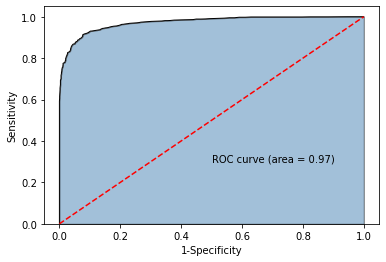

In [6]:
y_score = RF_class.predict_proba(X_test)[:,1]
fpr,tpr,threshold = metrics.roc_curve(y_test,y_score)

#计算AUC值
roc_auc = metrics.auc(fpr,tpr)
#绘制面积图
plt.stackplot(fpr,tpr,color='steelblue',alpha=0.5,edgecolor='black')

#添加边际线和对角线
plt.plot(fpr,tpr,color = 'black',lw = 1)
plt.plot([0,1],[0,1],color = 'red',linestyle = '--')

#添加文本信息
plt.text(0.5,0.3,'ROC curve (area = %0.2f)'%roc_auc)

#添加x轴和y轴标签
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')

plt.show()

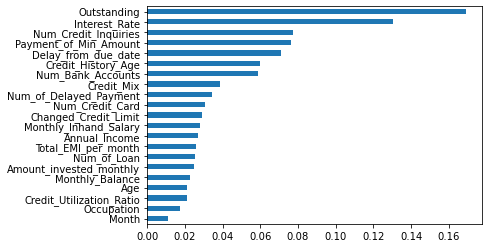

In [7]:
#变量的重要性程度值
importance = RF_class.feature_importances_

#构建含序列用于绘图
Impt_Series = pd.Series(importance,index = X_train.columns)

#对序列排序绘图
Impt_Series.sort_values(ascending = True).plot(kind = 'barh')
plt.show()

In [8]:
features = pd.DataFrame(Impt_Series.sort_values(ascending = True))

In [9]:
features = features.head(5)

In [10]:
features

,0
Month,0.010833
Occupation,0.017621
Credit_Utilization_Ratio,0.020851
Age,0.021375
Monthly_Balance,0.022468
